# Machine learning (60 minutes)
ACPSEM Machine Learning Workshop 2019, 29 - 31 May 2019

Yu Sun, yu.sun@sydney.edu.au

University of Sydney

This session demonstrates several key concepts in machine learning:
* Correlation
* Data partitioning
* Model fitting
* Performance evaluation (including sensititvy and specificity)

## Correlation (15 minutes)
The part shows how to compute the correlation coefficient of two vectors. First, we generate two *random* vectors.

In [0]:
# Generate two random vectors
import numpy as np
np.random.seed(1234)           # For reproducibility purposes
x1 = np.random.randn(1000)
x2 = np.random.randn(1000)
print('x1 first 50 items:', x1[:50])
print('x2 first 50 items:', x2[:50])

x1 first 50 items: [ 4.71435164e-01 -1.19097569e+00  1.43270697e+00 -3.12651896e-01
 -7.20588733e-01  8.87162940e-01  8.59588414e-01 -6.36523504e-01
  1.56963721e-02 -2.24268495e+00  1.15003572e+00  9.91946022e-01
  9.53324128e-01 -2.02125482e+00 -3.34077366e-01  2.11836468e-03
  4.05453412e-01  2.89091941e-01  1.32115819e+00 -1.54690555e+00
 -2.02646325e-01 -6.55969344e-01  1.93421376e-01  5.53438911e-01
  1.31815155e+00 -4.69305285e-01  6.75554085e-01 -1.81702723e+00
 -1.83108540e-01  1.05896919e+00 -3.97840228e-01  3.37437654e-01
  1.04757857e+00  1.04593826e+00  8.63717292e-01 -1.22091575e-01
  1.24712954e-01 -3.22794806e-01  8.41674713e-01  2.39096052e+00
  7.61995878e-02 -5.66445930e-01  3.61419367e-02 -2.07497760e+00
  2.47792200e-01 -8.97156784e-01 -1.36794833e-01  1.82891913e-02
  7.55413982e-01  2.15268581e-01]
x2 first 50 items: [-1.582208   -1.62019021  0.04656189 -1.67982886  1.39589233 -0.84497142
  0.81400694 -0.04974231  0.53424675 -0.80700913  0.84164074 -0.55817262
 -

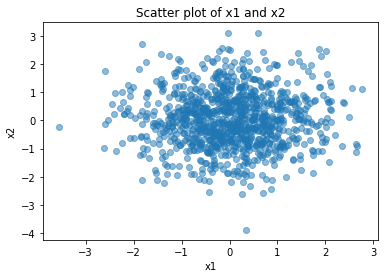

In [0]:
# Visualise
import matplotlib.pyplot as plt
plt.scatter(x=x1, y=x2, alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of x1 and x2')
plt.show()

In [0]:
# Compute the Pearson correlation
import scipy.stats
print('Pearson correlation: %.3f, likelihood of non-correlated systems: %.3f' \
      % scipy.stats.pearsonr(x1, x2))
print('Spearman correlation: %.3f, likelihood of non-correlated systems: %.3f' \
      % scipy.stats.spearmanr(x1, x2))


Pearson correlation: 0.010, likelihood of non-correlated systems: 0.750
Spearman correlation: 0.003, likelihood of non-correlated systems: 0.915


Recall that these two vectors are independent, so that the correlation is almost zero. What about some correlated data?

In [0]:
# Gnerate some non-independent data
np.random.seed(0)
x3 = np.random.randn(1000)
noise = np.random.randn(1000)
x4 = np.exp(x3) + noise

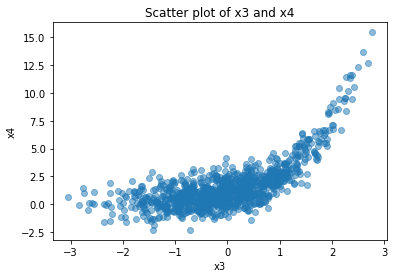

In [0]:
# Visualise
import matplotlib.pyplot as plt
plt.scatter(x=x3, y=x4, alpha=0.5)
plt.xlabel('x3')
plt.ylabel('x4')
plt.title('Scatter plot of x3 and x4')
plt.show()

Compute the Pearson and Spearman correlation coefficients for `x3` and `x4`.

In [0]:
# You code goes here:





## Classifier training (45 minutes)
In this part, we will create a learning task and go through the key steps.

### Geneate data for classification (5 minutes)

In [0]:
# Import the scikit-learn library
import sklearn
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [0]:
# Generate some dummy data
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=10, 
                           n_clusters_per_class=1)

In [0]:
# Visualise the data
# First we define a function to do the scatter plot
def plotData(x, y, title='Title'):
  'Scatter plot of the x, colour indicated by y'
  import matplotlib.pyplot as plt
  import matplotlib.patches as mpatches
  plt.style.use('ggplot')
  plt.scatter(x[:,0], x[:, 1], 
              c=y, 
              cmap=ListedColormap(['orange', 'darkcyan']), # for 0 and 1
              edgecolors='k',
              s=80)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title(title)
  patches = (mpatches.Patch(color='orange', label='Negative'),
             mpatches.Patch(color='darkcyan', label='Positive'))
  plt.legend(handles=patches)
  plt.show()

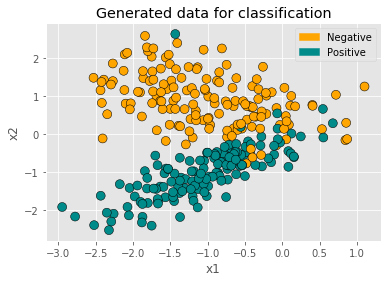

In [0]:
plotData(X, y, 'Generated data for classification')

### Data partitioning  (5 minutes)

In [0]:
# Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [0]:
# Check the dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 2), (90, 2), (210,), (90,))

Exercise: plot the training data and test data.

### Model fitting  (5 minutes)

In [0]:
# Train a support vector machine (SVM) model
from sklearn.svm import SVC
svm_model = SVC(gamma=1, C=1)

In [0]:
# Train the model
svm_model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Performance evalution  (30 minutes)

#### Apply the model on the test data

In [0]:
# Predict on the test data
svm_pred = svm_model.predict(X_test)
print('Prediction (SVM): ', svm_pred)
print('Ground truth: ', y_test)

Prediction (SVM):  [0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0
 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1
 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1]
Ground truth:  [0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0
 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1
 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1]


We need to choose a proper metric to *quantitatively* measure the performance of the model. The most straightfoward metric is **accuracy**.

#### Accuracy
Defined as the percentage that the prediction agrees with the ground truth (`y_test`).

In [0]:
# Compute the accuracy for the SVM model
sum(svm_pred == y_test) / svm_pred.size

0.9666666666666667

Explore the different component in the previous expression for accuracy, for example: what does it mean for `svm_pred == y_test`? Use `print()` to inspect each component.

In [0]:
# You code goes here:
# e.g.
print(svm_pred==y_test)





Exercise: for a learning task of imbalanced data (say 90% positive, 10% negative). If a model simply predict everything as positive, what's the accuracy? In another word, is accuracy suitable for all learning scenarios?

The answer to that leads to sensitivity and specificity analysis.

#### Sensitivity and Specificity
Write a function `calSS()` to calculate sensitivity and specificity given their definitions: $$Sensitivity = TP / (TP+FN)$$ $$Specificity = TN / (TN+FP)$$

$TP$: true positive;
$TN$: true negative;
$FP$: false positive;
$FN$: false negative.

In [0]:
def calSS(pred, truth):
    '''
    Compute the sensitivity and specificity of a prediction given the ground truth
    Input:
        pred - predicted outcome (binary)
        truth - ground truth (binary)
    Return: 
        A tuple of sensitivity and specificity value
    '''
    tp = np.logical_and(pred==1, truth==1) # True Positivee (TP)
    fp = np.logical_and(pred==1, truth==0) # False Positive (FP)
    tn = np.logical_and(pred==0, truth==0) # True Negative (TN)
    fn = np.logical_and(pred==0, truth==1) # False Negative (FN)

    sen = tp.sum() / (tp.sum() + fn.sum())
    spe = tn.sum() / (tn.sum() + fp.sum())
    return sen, spe

In [0]:
# Calculate the results on our previous model
print("Sensitivity: %.2f, specificity: %.2f" % calSS(svm_pred, y_test))

Sensitivity: 0.95, specificity: 0.98


Back to the last question, in an imbalanced dataset (90% positive, 10% negative), if a model simply output everything as positive, it will have a high sensitivity. However, it won't have a high specificity. 

*In another word, sensitivity and specifity give you a 'stereo' overview of the model.*

We will use (sen, spe) as a short hand notation for a sensitivity and specificity pair.

#### Receiver operating characteristics (ROC) analysis

Some models (e.g. the logistic regression) output a probabilistic output rather than a binary output. Now we train a logistic regression using the same training data.

In [0]:
# Initiate the logistic regression model
lor_model = sklearn.linear_model.LogisticRegression(solver='lbfgs')
# Train the model
lor_model.fit(X_train, y_train)
# Test the model
lor_pred = lor_model.predict_proba(X_test)
print(lor_pred)

[[6.42232666e-01 3.57767334e-01]
 [3.51935717e-01 6.48064283e-01]
 [3.68129317e-02 9.63187068e-01]
 [9.99428860e-01 5.71140146e-04]
 [7.74211101e-02 9.22578890e-01]
 [1.63396294e-01 8.36603706e-01]
 [3.49295185e-02 9.65070481e-01]
 [7.95346892e-01 2.04653108e-01]
 [9.45807417e-01 5.41925827e-02]
 [9.46268200e-01 5.37318002e-02]
 [2.05316720e-01 7.94683280e-01]
 [3.53332621e-01 6.46667379e-01]
 [8.60037574e-01 1.39962426e-01]
 [2.00132153e-01 7.99867847e-01]
 [6.38988994e-03 9.93610110e-01]
 [9.29464962e-02 9.07053504e-01]
 [2.14125400e-02 9.78587460e-01]
 [9.44195096e-01 5.58049039e-02]
 [6.15802099e-01 3.84197901e-01]
 [8.41565112e-01 1.58434888e-01]
 [9.90633433e-01 9.36656683e-03]
 [5.49092711e-01 4.50907289e-01]
 [2.34378451e-03 9.97656215e-01]
 [3.22983303e-03 9.96770167e-01]
 [9.16861601e-01 8.31383985e-02]
 [9.89688884e-01 1.03111165e-02]
 [2.04448059e-02 9.79555194e-01]
 [2.26025005e-02 9.77397500e-01]
 [6.11220355e-01 3.88779645e-01]
 [3.20414727e-02 9.67958527e-01]
 [9.068392

For each row in the output, the two numbers give the probability that each test sample falls into the two categories. Notice, they sum up to 1.0 for each row.

An issue arises as we cannot directly compute the (sen, spe) now. But what we can do is the first threshold the value, i.e. turn each row to a binary decision, then compute the (sen, spe). 

We will define a function `thres()` to do that.

In [0]:
def thres(pred, t):
    '''
    Convert a continuous output to binary output using a threshold.
    Input:
        pred - the prediction vector
        t - a threshold
    Output:
        A binary vector
    '''
    return (pred >= t) * 1

In [0]:
# Test it on the logistic regression output using a threshold of 0.5
lor_pred_binary = thres(lor_pred[:, 1], t=0.5)
print(lor_pred_binary)

[0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1
 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1]


In [0]:
# Now we can compute the (sen, spe)
print("Sensitivity: %.2f, specificity: %.2f" % calSS(lor_pred_binary, y_test))

Sensitivity: 0.98, specificity: 0.96


The result above is dependent on the *threshold*. For a given threshold, we can convert the continuous output into binary. Then we can compute the sensitivity and specificity.

What if we create **a series of thresholds** and compute **the corresponding (sen, spe)** respectively?

In [0]:
# Create a series of thresholds
ts = range(0, 11)

# Create variables to hold the (sen, spe) pairs
lor_pred_sen = []
lor_pred_spe = []

# Iterate through each threshold and compute the corresponding (sen, spe) pairs
for eachT in ts:
    sen, spe = calSS(thres(lor_pred[:, 1], t=eachT/10.0), y_test)
    lor_pred_sen.append(sen)
    lor_pred_spe.append(spe)
    
# Print the result
for i in range(0, len(ts)):
    print('Thresholded at %s, sensitivity: %.3f, specificity: %.3f' % 
          (i/10.0, lor_pred_sen[i], lor_pred_spe[i]))

Thresholded at 0.0, sensitivity: 1.000, specificity: 0.000
Thresholded at 0.1, sensitivity: 1.000, specificity: 0.612
Thresholded at 0.2, sensitivity: 1.000, specificity: 0.755
Thresholded at 0.3, sensitivity: 1.000, specificity: 0.796
Thresholded at 0.4, sensitivity: 0.976, specificity: 0.939
Thresholded at 0.5, sensitivity: 0.976, specificity: 0.959
Thresholded at 0.6, sensitivity: 0.927, specificity: 1.000
Thresholded at 0.7, sensitivity: 0.878, specificity: 1.000
Thresholded at 0.8, sensitivity: 0.732, specificity: 1.000
Thresholded at 0.9, sensitivity: 0.707, specificity: 1.000
Thresholded at 1.0, sensitivity: 0.000, specificity: 1.000


Plot the (sen, spe) points, what do we get? This will give the ROC curve.

Text(0.5, 1.0, 'Receiver Operating Charcteristics Curve')

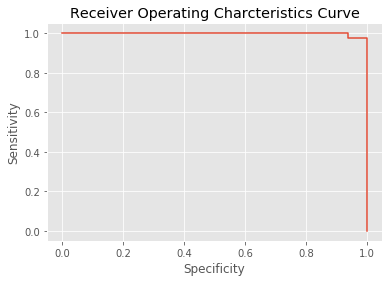

In [0]:
# Plot the (sen, spe) pairs
import numpy as np
plt.step(x=np.array(lor_pred_spe), y=np.array(lor_pred_sen), where='post')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Charcteristics Curve')

By convention, the x-axis is '1-specificity'.

Text(0.5, 1.0, 'Receiver Operating Charcteristics Curve')

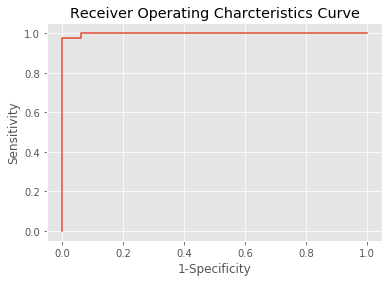

In [0]:
# Change the x to (1-spe) for the ROC curve
plt.step(x=1-np.array(lor_pred_spe), y=np.array(lor_pred_sen), where='post')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Charcteristics Curve')

The area under the ROC curve (AUC of ROC) is a measure of model performance.

In summary, in terms of robustness:
$$ROC >  (sen, spe) > accuracy$$




In [0]:
# Print the session information for reproducibility purposes
import IPython
print(IPython.sys_info())

{'commit_hash': 'b467d487e',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/usr/local/lib/python3.6/dist-packages/IPython',
 'ipython_version': '5.5.0',
 'os_name': 'posix',
 'platform': 'Linux-4.14.79+-x86_64-with-Ubuntu-18.04-bionic',
 'sys_executable': '/usr/bin/python3',
 'sys_platform': 'linux',
 'sys_version': '3.6.7 (default, Oct 22 2018, 11:32:17) \n[GCC 8.2.0]'}




---

This is the end of the session.